# Task 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1=pd.read_csv('DS2_C6_S3_Cities_Data_Challenge.csv')
df2=pd.read_csv('DS2_C6_S3_MoveHubCostOfLiving_Data_Challenge.csv')
df3=pd.read_csv('DS2_C6_S3_MoveHubQualityOfLife_Data_Challenge.csv')
df4=pd.read_csv('DS2_C6_S3_WorldCities_Data_Challenge.csv')

# Task 2

In [5]:
df4.rename(columns={'city':'City'},inplace=True)

In [7]:
df4.rename(columns={'city':'City'},inplace=True)

In [10]:
df4.rename(columns={'city':'City'},inplace=True)
df4.head()

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [20]:
# Renaming the column city as City from WorldCities_Data
df4.rename(columns={'city':'City'},inplace=True)
df4.head()

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
5,Shanghai,Shanghai,31.1667,121.4667,China,CN,CHN,Shanghai,admin,22120000.0,1156073548


In [11]:
df4.sort_values(by=['population'],ascending=False)

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
9469,Wé,We,-20.9000,167.2667,New Caledonia,NC,NCL,Province Îles,admin,NaN,1540672599
9470,Preševo,Presevo,42.3067,21.6500,Serbia,RS,SRB,Preševo,admin,NaN,1688970219
9471,Bujanovac,Bujanovac,42.4667,21.7667,Serbia,RS,SRB,Bujanovac,admin,NaN,1688743477
9472,Kitamilo,Kitamilo,0.2222,33.2061,Uganda,UG,UGA,Buvuma,admin,NaN,1800610172


In [19]:
#Sort the values of the population feature of WorldCities_Data in descending order.
df4.sort_values(by=['population'],ascending= False)

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
5,Shanghai,Shanghai,31.1667,121.4667,China,CN,CHN,Shanghai,admin,22120000.0,1156073548
...,...,...,...,...,...,...,...,...,...,...,...
9468,Star Dojran,Star Dojran,41.1792,22.7247,Macedonia,MK,MKD,Dojran,admin,NaN,1807304153
9469,Wé,We,-20.9000,167.2667,New Caledonia,NC,NCL,Province Îles,admin,NaN,1540672599
9470,Preševo,Presevo,42.3067,21.6500,Serbia,RS,SRB,Preševo,admin,NaN,1688970219
9471,Bujanovac,Bujanovac,42.4667,21.7667,Serbia,RS,SRB,Bujanovac,admin,NaN,1688743477


In [13]:
df4.nunique()

City          23927
city_ascii    23893
lat           23186
lng           24579
country         224
iso2            223
iso3            224
admin_name     4013
capital           3
population    20253
id            26569
dtype: int64

In [11]:
df4.nunique()

City          23927
city_ascii    23893
lat           23186
lng           24579
country         224
iso2            223
iso3            224
admin_name     4013
capital           3
population    20253
id            26569
dtype: int64

In [ ]:
df4.drop_duplicates(subset='City',keep=False,inplace=True)

In [16]:
df4.drop_duplicates(subset='City',keep=False,inplace=True)

In [12]:
# Remove the duplicate values of the 'city' feature of the WorldCities_Data by keeping first value intact
df4.drop_duplicates(subset='City', keep=False, inplace=True)
df4

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
5,Shanghai,Shanghai,31.1667,121.4667,China,CN,CHN,Shanghai,admin,22120000.0,1156073548
...,...,...,...,...,...,...,...,...,...,...,...
26564,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26565,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26566,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26567,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159


In [13]:
df4.nunique()

City          22439
city_ascii    22423
lat           19549
lng           20713
country         217
iso2            216
iso3            217
admin_name     3899
capital           3
population    17672
id            22439
dtype: int64

# Merging all the Datasets

In [21]:
from functools import reduce
df=[df1,df2,df3.df4]
final_df=reduce(lambda left,right: pd.merge(left,right,on=['City']),df)

AttributeError: 'DataFrame' object has no attribute 'df4'

In [14]:
from functools import reduce
df=[df1,df2,df3,df4]     # defined the list of all dataframes
final_df= reduce(lambda left,right: pd.merge(left,right, on=['City']),df)
final_df.head()

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Orlando,United States,1.96,5.88,7.52,0.66,1176.78,2013.61,84.39,71.07,...,Orlando,28.4772,-81.3369,United States,US,USA,Florida,NaN,1822394.0,1840015099
1,Oslo,Norway,3.36,11.20,12.32,1.57,2016.66,2800.92,82.09,52.51,...,Oslo,59.9111,10.7528,Norway,NO,NOR,Oslo,primary,693494.0,1578324706
2,Quito,Ecuador,1.22,2.94,6.54,0.29,310.54,196.13,67.15,14.24,...,Quito,-0.2186,-78.5097,Ecuador,EC,ECU,Pichincha,primary,2011388.0,1218441993
3,Madrid,Spain,1.70,6.82,3.92,1.24,1193.48,1278.72,85.37,54.07,...,Madrid,40.4189,-3.6919,Spain,ES,ESP,Madrid,primary,3266126.0,1724616994
4,Manama,Bahrain,2.60,5.20,19.61,0.17,1078.72,1176.78,77.56,40.26,...,Manama,26.2167,50.5831,Bahrain,BH,BHR,Al ‘Āşimah,primary,157474.0,1048989486


In [ ]:
# Also we can merge like this
'''n_df1=pd.merge(df1,df2, on='City')
n_df2=pd.merge(df3,df4, on='City')
final_df=pd.merge(n_df1,n_df2, on='City')'''

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   119 non-null    object 
 1   Country                119 non-null    object 
 2   Cappuccino             119 non-null    float64
 3   Cinema                 119 non-null    float64
 4   Wine                   119 non-null    float64
 5   Gasoline               119 non-null    float64
 6   Avg Rent               119 non-null    float64
 7   Avg Disposable Income  119 non-null    float64
 8   Movehub Rating         119 non-null    float64
 9   Purchase Power         119 non-null    float64
 10  Health Care            119 non-null    float64
 11  Pollution              119 non-null    float64
 12  Quality of Life        119 non-null    float64
 13  Crime Rating           119 non-null    float64
 14  city_ascii             119 non-null    object 
 15  lat   

In [16]:
final_df=final_df.drop(columns='country') # Here we remove the country column as it has duplicate as Country.

# Label Encoding

In [17]:
from sklearn import preprocessing #import as minmax_scale,StandardScaler,LabelEncoder
lbl_end=preprocessing.LabelEncoder()#object of labelencoding
final_df['City']=lbl_end.fit_transform(final_df['City'])
final_df['Country']=lbl_end.fit_transform(final_df['Country'])
final_df['city_ascii']=lbl_end.fit_transform(final_df['city_ascii'])
final_df['iso2']=lbl_end.fit_transform(final_df['iso2'])
final_df['iso3']=lbl_end.fit_transform(final_df['iso3'])
final_df['admin_name']=lbl_end.fit_transform(final_df['admin_name'])
final_df['capital']=lbl_end.fit_transform(final_df['capital'])

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   119 non-null    int32  
 1   Country                119 non-null    int32  
 2   Cappuccino             119 non-null    float64
 3   Cinema                 119 non-null    float64
 4   Wine                   119 non-null    float64
 5   Gasoline               119 non-null    float64
 6   Avg Rent               119 non-null    float64
 7   Avg Disposable Income  119 non-null    float64
 8   Movehub Rating         119 non-null    float64
 9   Purchase Power         119 non-null    float64
 10  Health Care            119 non-null    float64
 11  Pollution              119 non-null    float64
 12  Quality of Life        119 non-null    float64
 13  Crime Rating           119 non-null    float64
 14  city_ascii             119 non-null    int32  
 15  lat   

# Normalization (Data Scaling)

In [19]:
final_df.columns

Index(['City', 'Country', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline',
       'Avg Rent', 'Avg Disposable Income', 'Movehub Rating', 'Purchase Power',
       'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating',
       'city_ascii', 'lat', 'lng', 'iso2', 'iso3', 'admin_name', 'capital',
       'population', 'id'],
      dtype='object')

In [20]:
A=final_df.drop(['lat', 'lng'],axis=1)
A.columns

Index(['City', 'Country', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline',
       'Avg Rent', 'Avg Disposable Income', 'Movehub Rating', 'Purchase Power',
       'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating',
       'city_ascii', 'iso2', 'iso3', 'admin_name', 'capital', 'population',
       'id'],
      dtype='object')

In [21]:
B=final_df[['lat', 'lng']]
B.columns

Index(['lat', 'lng'], dtype='object')

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
SC=StandardScaler()
new_df=SC.fit_transform(A)
new_df

array([[ 0.727133  ,  1.48484017,  0.03971319, ...,  1.32224325,
        -0.35611106,  1.47201998],
       [ 0.75653457,  0.32681081,  1.80875509, ...,  0.44809355,
        -0.51641709,  0.51604495],
       [ 0.932944  , -0.73471611, -0.89535182, ...,  0.44809355,
        -0.32927354, -0.79863413],
       ...,
       [-1.56618963, -0.1074502 ,  0.78523799, ...,  0.44809355,
        -0.045818  , -0.13347977],
       [-1.53678805,  1.29183528, -0.14982702, ..., -1.30020586,
        -0.27034727,  1.30022797],
       [-1.50738648,  0.27855958,  0.34297751, ..., -1.30020586,
        -0.40646411,  0.42877736]])

In [23]:
new_data=pd.DataFrame(new_df,columns=A.columns)  # Converting array to the DataFrame
new_data

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,Pollution,Quality of Life,Crime Rating,city_ascii,iso2,iso3,admin_name,capital,population,id
0,0.727133,1.484840,0.039713,-0.107092,0.009117,-0.861875,0.157671,0.766021,0.857745,1.374518,...,0.905984,1.137081,0.832282,0.727133,1.476891,1.480001,-0.827198,1.322243,-0.356111,1.472020
1,0.756535,0.326811,1.808755,0.626728,1.254975,1.688191,1.321998,1.606574,0.517077,0.467050,...,-0.684215,0.646741,-0.336495,0.756535,0.585764,0.588504,0.442352,0.448094,-0.516417,0.516045
2,0.932944,-0.734716,-0.895352,-0.512623,-0.245246,-1.898714,-1.043198,-1.174370,-1.695787,-1.404113,...,-1.246705,-0.454530,0.430927,0.932944,-0.651912,-0.649686,0.535246,0.448094,-0.329274,-0.798634
3,0.315511,1.002328,-0.288823,0.022568,-0.925276,0.763442,0.180822,-0.018568,1.002899,0.543324,...,0.330037,0.141327,-0.108601,0.315511,-0.602405,-0.600158,-0.053082,0.448094,-0.151098,1.050462
4,0.344913,-1.458484,0.848418,-0.200888,3.147122,-2.234987,0.021731,-0.127402,-0.153892,-0.131898,...,-1.158275,0.317778,-1.277977,0.344913,-1.245997,-1.244017,-1.663244,0.448094,-0.592533,-1.417657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,-1.624993,-1.554987,0.709422,0.657073,0.673575,-0.049216,0.442528,1.724835,1.287283,1.421456,...,-1.352436,1.545402,0.009832,-1.624993,-1.493532,-1.491655,0.999716,-1.300206,-0.423792,-1.463143
115,-1.595591,1.002328,-0.819536,-0.089160,-0.896726,0.623328,-0.764621,-0.473633,0.626683,0.084701,...,-0.730352,0.702602,0.170733,-1.595591,-0.602405,-0.600158,1.371291,-0.426056,-0.567340,1.051580
116,-1.566190,-0.107450,0.785238,-0.016054,1.376965,-0.385489,-0.834726,-0.911936,-0.621941,-1.062835,...,0.555340,-0.758665,0.334027,-1.566190,0.041187,0.043701,-1.663244,0.448094,-0.045818,-0.133480
117,-1.536788,1.291835,-0.149827,-0.468484,-0.530755,1.828304,-1.172249,-0.996834,-0.990751,-0.980204,...,-0.639615,-0.716991,0.201837,-1.536788,1.328370,1.331419,-1.601314,-1.300206,-0.270347,1.300228


In [24]:
Final_data=pd.concat([new_data,B],axis=1)  # Combining the Two datasets i.e: new_data and B
Final_data

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,Crime Rating,city_ascii,iso2,iso3,admin_name,capital,population,id,lat,lng
0,0.727133,1.484840,0.039713,-0.107092,0.009117,-0.861875,0.157671,0.766021,0.857745,1.374518,...,0.832282,0.727133,1.476891,1.480001,-0.827198,1.322243,-0.356111,1.472020,28.4772,-81.3369
1,0.756535,0.326811,1.808755,0.626728,1.254975,1.688191,1.321998,1.606574,0.517077,0.467050,...,-0.336495,0.756535,0.585764,0.588504,0.442352,0.448094,-0.516417,0.516045,59.9111,10.7528
2,0.932944,-0.734716,-0.895352,-0.512623,-0.245246,-1.898714,-1.043198,-1.174370,-1.695787,-1.404113,...,0.430927,0.932944,-0.651912,-0.649686,0.535246,0.448094,-0.329274,-0.798634,-0.2186,-78.5097
3,0.315511,1.002328,-0.288823,0.022568,-0.925276,0.763442,0.180822,-0.018568,1.002899,0.543324,...,-0.108601,0.315511,-0.602405,-0.600158,-0.053082,0.448094,-0.151098,1.050462,40.4189,-3.6919
4,0.344913,-1.458484,0.848418,-0.200888,3.147122,-2.234987,0.021731,-0.127402,-0.153892,-0.131898,...,-1.277977,0.344913,-1.245997,-1.244017,-1.663244,0.448094,-0.592533,-1.417657,26.2167,50.5831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,-1.624993,-1.554987,0.709422,0.657073,0.673575,-0.049216,0.442528,1.724835,1.287283,1.421456,...,0.009832,-1.624993,-1.493532,-1.491655,0.999716,-1.300206,-0.423792,-1.463143,-34.9289,138.6011
115,-1.595591,1.002328,-0.819536,-0.089160,-0.896726,0.623328,-0.764621,-0.473633,0.626683,0.084701,...,0.170733,-1.595591,-0.602405,-0.600158,1.371291,-0.426056,-0.567340,1.051580,38.3453,-0.4831
116,-1.566190,-0.107450,0.785238,-0.016054,1.376965,-0.385489,-0.834726,-0.911936,-0.621941,-1.062835,...,0.334027,-1.566190,0.041187,0.043701,-1.663244,0.448094,-0.045818,-0.133480,31.9500,35.9333
117,-1.536788,1.291835,-0.149827,-0.468484,-0.530755,1.828304,-1.172249,-0.996834,-0.990751,-0.980204,...,0.201837,-1.536788,1.328370,1.331419,-1.601314,-1.300206,-0.270347,1.300228,36.9081,30.6956


# Task 3

In [25]:
from sklearn.metrics import silhouette_score
for k in range(2,8):
    for i in ['single','complete','average','ward']:
        hc=AgglomerativeClustering(n_clusters=k,)
        y_hc=hc.fit_predict(Final_data)
        print(k,i,silhouette_score(Final_data,y_hc))

2 single 0.5376827457611211
2 complete 0.5376827457611211
2 average 0.5376827457611211
2 ward 0.5376827457611211
3 single 0.5111794903046685
3 complete 0.5111794903046685
3 average 0.5111794903046685
3 ward 0.5111794903046685
4 single 0.4412050406675661
4 complete 0.4412050406675661
4 average 0.4412050406675661
4 ward 0.4412050406675661
5 single 0.526300660560129
5 complete 0.526300660560129
5 average 0.526300660560129
5 ward 0.526300660560129
6 single 0.5444803372562635
6 complete 0.5444803372562635
6 average 0.5444803372562635
6 ward 0.5444803372562635
7 single 0.5492597280562955
7 complete 0.5492597280562955
7 average 0.5492597280562955
7 ward 0.5492597280562955


Here we are getting K=6 as best value i.e 0.5444803372562635 

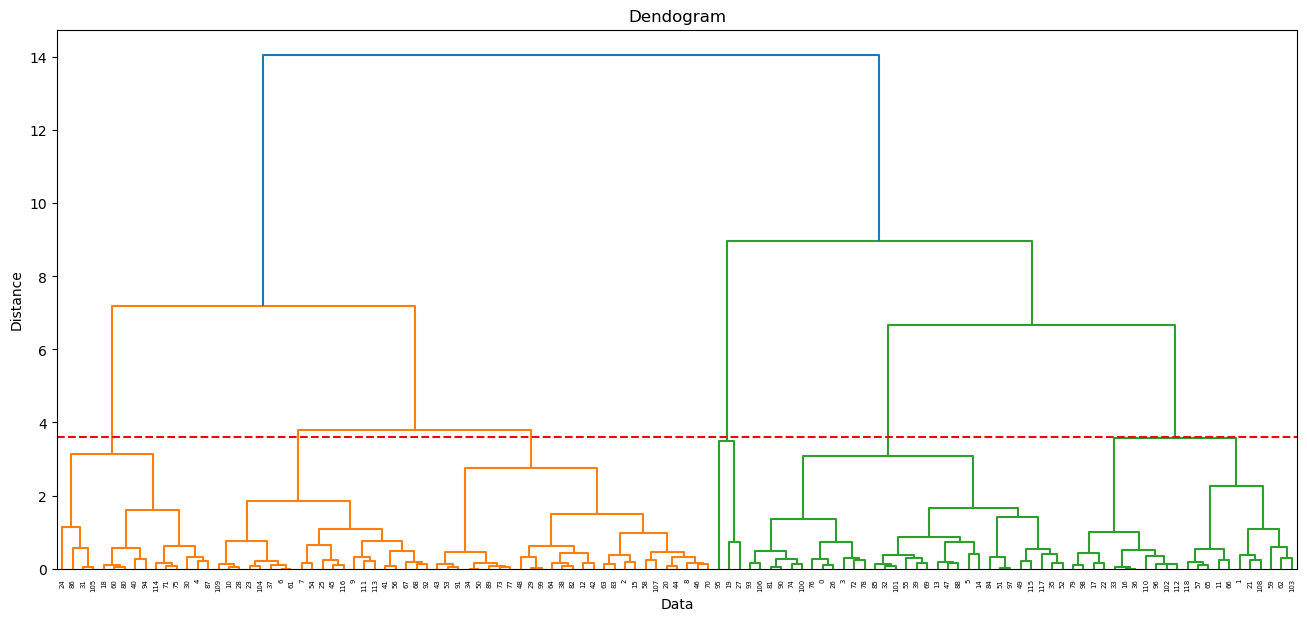

In [31]:
x=Final_data.iloc[:,[1,6]]
plt.figure(figsize=(16,7))
sch.dendrogram(sch.linkage(x,method='ward'),labels=Final_data.index)
plt.axhline(y=3.6,color='red',linestyle='--')  # here we are ushing 18 because by silhouette method we are getting best K value is 3=0.22984933786663322 hence we have to cut 3 lines and for that we have choose 18 as its cutting the 3 lines
plt.title('Dendogram')
plt.xlabel('Data')
plt.ylabel('Distance')
plt.show()

# Task 4

In [32]:
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [33]:
X=Final_data.to_numpy()

In [34]:
def hier(n=3,affinity='manhattan',linkage='complete',grid=False,column1=0,column2=1):
    model1=AgglomerativeClustering(n_clusters=n,affinity=affinity,linkage=linkage)
    y_pred=model1.fit_predict(X)
    colors = plt.cm.Spectral(np.linspace(0, 1,n))
    print('The Silhoutee Score is ',(silhouette_score(X,y_pred)))
    for i,c  in zip(np.unique(y_pred),colors):
        plt.scatter(X[y_pred==i,column1],X[y_pred==i,column2],color=c)
        plt.tight_layout()
    
    plt.grid(grid)
    plt.show()

In [35]:
import ipywidgets
ipywidgets.interact(hier,n=(3,5,1),column1=(0,12,1),column2=(0,12,1),linkage=['ward','complete','single','average'],grid=False,affinity=['euclidean','l1','l2','manhattan','cosine','precomputed'])

interactive(children=(IntSlider(value=3, description='n', max=5, min=3), Dropdown(description='affinity', inde…

<function __main__.hier(n=3, affinity='manhattan', linkage='complete', grid=False, column1=0, column2=1)>